In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
! pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
start = '2010-01-01'
end = '2019-12-31'



In [ ]:
df = pd.read_csv('/content/AAPL.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,04-01-2010,7.622500,7.660714,7.585000,7.643214,6.535085,493729600
1,05-01-2010,7.664286,7.699643,7.616071,7.656429,6.546383,601904800
2,06-01-2010,7.656429,7.686786,7.526786,7.534643,6.442255,552160000
3,07-01-2010,7.562500,7.571429,7.466071,7.520714,6.430344,477131200
4,08-01-2010,7.510714,7.571429,7.466429,7.570714,6.473097,447610800


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(2768, 7)

In [ ]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,04-01-2010,7.622500,7.660714,7.585000,7.643214,6.535085,493729600
1,1,05-01-2010,7.664286,7.699643,7.616071,7.656429,6.546383,601904800
2,2,06-01-2010,7.656429,7.686786,7.526786,7.534643,6.442255,552160000
3,3,07-01-2010,7.562500,7.571429,7.466071,7.520714,6.430344,477131200
4,4,08-01-2010,7.510714,7.571429,7.466429,7.570714,6.473097,447610800


In [ ]:
df = df.drop(['Date','Adj Close'],axis=1)         #Date aur Adj Close ko hatana
df.head()

,index,Open,High,Low,Close,Volume
0,0,7.622500,7.660714,7.585000,7.643214,493729600
1,1,7.664286,7.699643,7.616071,7.656429,601904800
2,2,7.656429,7.686786,7.526786,7.534643,552160000
3,3,7.562500,7.571429,7.466071,7.520714,477131200
4,4,7.510714,7.571429,7.466429,7.570714,447610800


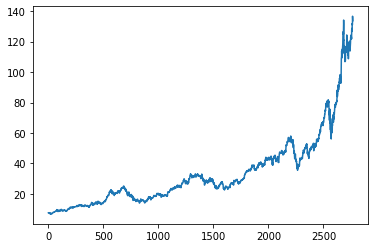

In [ ]:
plt.plot(df.Close)                             # Close column ka graph plot karna

In [ ]:
ma100 = df.Close.rolling(100).mean()            #  moving average nikalna 100 ka
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    118.000475
2764    118.223525
2765    118.489800
2766    118.699475
2767    118.925550
Name: Close, Length: 2768, dtype: float64

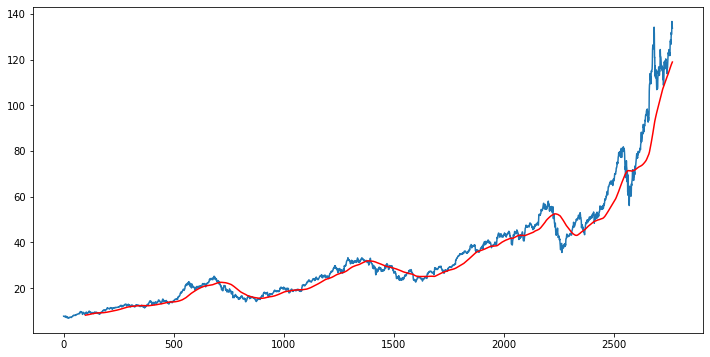

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()          #  moving average nikalna 200 ka
ma100
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763     98.809175
2764     99.158737
2765     99.494725
2766     99.866312
2767    100.218837
Name: Close, Length: 2768, dtype: float64

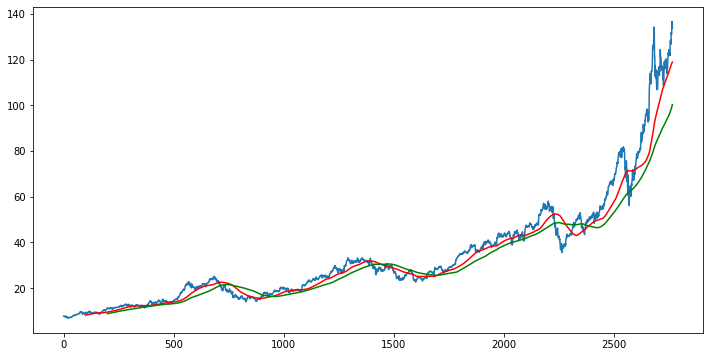

In [ ]:
plt.figure(figsize=(12,6))                    #   graph plot karna with both moving averages
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [ ]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])         #data split krna
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [ ]:
print(data_training.shape)           ## printing splitted data just to see
print(data_testing.shape)

(1937, 1)
(831, 1)


In [ ]:
data_training.head()              ##  printing training data just to see

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
from sklearn.preprocessing import MinMaxScaler      #### for LSTM model we have to scale down the data between 0 and 1 ,
scaler = MinMaxScaler(feature_range=(0,1))          #### we cannot provide this data

In [ ]:
data_training_array = scaler.fit_transform(data_training)       ### fitting the training data to scaler
data_training_array

array([[0.02296348],
       [0.02335041],
       [0.01978458],
       ...,
       [0.96032626],
       [0.98133428],
       [0.97664956]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]) :
  x_train.append(data_training_array[i-100 : i])
  y_train.append(data_training_array[i , 0])

#x_train             #####  use to see x_train

###  now we have to convert x_train and y_train to numpy arrays to provide these to LSTM model
x_train , y_train = np.array(x_train) , np.array(y_train)


In [ ]:
from keras.layers import Dense , Dropout , LSTM            #########    ML MODEL
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50 , activation='relu' , return_sequences=True , input_shape=(x_train.shape[1] , 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60 , activation='relu' , return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80 , activation='relu' , return_sequences=True ))
model.add(Dropout(0.4))


model.add(LSTM(units = 120 , activation='relu' ))
model.add(Dropout(0.5))


model.add(Dense(units=1))

2022-07-17 09:35:44.866092: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit(x_train , y_train , epochs=50)

Epoch 1/50
58/58 [==============================] - 15s 190ms/step - loss: 0.0407
Epoch 2/50
58/58 [==============================] - 11s 188ms/step - loss: 0.0107
Epoch 3/50
58/58 [==============================] - 11s 189ms/step - loss: 0.0092
Epoch 4/50
58/58 [==============================] - 11s 190ms/step - loss: 0.0083
Epoch 5/50
58/58 [==============================] - 11s 190ms/step - loss: 0.0072
Epoch 6/50
58/58 [==============================] - 11s 188ms/step - loss: 0.0065
Epoch 7/50
58/58 [==============================] - 11s 189ms/step - loss: 0.0066
Epoch 8/50
58/58 [==============================] - 11s 189ms/step - loss: 0.0060
Epoch 9/50
58/58 [==============================] - 11s 189ms/step - loss: 0.0063
Epoch 10/50
58/58 [==============================] - 11s 189ms/step - loss: 0.0055
Epoch 11/50
58/58 [==============================] - 12s 200ms/step - loss: 0.0054
Epoch 12/50
58/58 [==============================] - 11s 193ms/step - loss: 0.0051
Epoch 13/50
5

In [ ]:
import pickle

In [ ]:
model.save('/keras_model.h5')
####print(path)
# filepath = r'/keras_model.pckl'
# pickle.dump(model, open(filepath, 'wb'))


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2022-07-17 09:19:00--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  13.8MB/s    in 1.0s    

2022-07-17 09:19:02 (13.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \

Argument expected for the -c option
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
(23) Failed writing body


In [ ]:
!wget https://raw.githubusercontent.com/dataprofessor/code/master/streamlit/iris-ml-app.py

--2022-07-17 09:19:02--  https://raw.githubusercontent.com/dataprofessor/code/master/streamlit/iris-ml-app.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-07-17 09:19:02 ERROR 404: Not Found.



In [ ]:
!streamlit run /content/app.py &>/dev/null&

In [ ]:
! pip install pyngrok
from pyngrok import ngrok
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8502')
public_url

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 11.6 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=a3deed98d8c230f6cd5f38d9bc79a9a9c1f1904fd603c1cf7f9345fc0f58ad6c
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


t=2022-07-17T09:19:09+0000 lvl=warn msg="can't bind default web address, trying alternatives" obj=web addr=127.0.0.1:4040


<NgrokTunnel: "http://2f97-34-141-173-128.ngrok.io" -> "http://localhost:80">

In [ ]:
data_testing.head()

,Close
1937,39.912498
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing , ignore_index=True)

In [ ]:
final_df.head()

,Close
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498


In [ ]:
########     previous data is not scaled down , so we have to scale down this data
input_data = scaler.fit_transform(final_df)
input_data

array([[1.97740809e-04],
       [3.58404228e-03],
       [5.78390878e-03],
       [3.68289291e-03],
       [3.95478652e-03],
       [3.60874011e-03],
       [1.08510170e-02],
       [1.31497440e-02],
       [1.20374520e-02],
       [1.07274290e-02],
       [1.67338259e-02],
       [2.67444247e-02],
       [2.91667694e-02],
       [2.73623647e-02],
       [2.90678792e-02],
       [3.43821931e-02],
       [3.33934594e-02],
       [3.28249645e-02],
       [1.99223766e-02],
       [2.55826875e-02],
       [2.68680127e-02],
       [2.91667694e-02],
       [2.86971349e-02],
       [2.75601055e-02],
       [2.88701384e-02],
       [2.82274906e-02],
       [2.83757962e-02],
       [2.61264847e-02],
       [2.71646140e-02],
       [3.27755194e-02],
       [2.90184341e-02],
       [3.03037592e-02],
       [3.25777786e-02],
       [3.16385295e-02],
       [1.67832314e-02],
       [7.98377529e-03],
       [1.08757247e-02],
       [7.34112754e-03],
       [5.19066658e-03],
       [1.97740809e-04],


In [ ]:
input_data.shape

(931, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100 : i])
  y_test.append(input_data[i , 0])

In [ ]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [ ]:
#########    MAKING PREDICTIONS

y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

(831, 1)

In [ ]:
y_test

array([0.0431569 , 0.03977061, 0.04372544, 0.0407346 , 0.04088289,
       0.03430804, 0.0276837 , 0.02397606, 0.02066391, 0.02706576,
       0.02975997, 0.02741181, 0.02948808, 0.02872183, 0.03037791,
       0.02790615, 0.03262722, 0.03240478, 0.03373951, 0.0338878 ,
       0.03549448, 0.034135  , 0.03658205, 0.04372544, 0.04518377,
       0.04342881, 0.03408555, 0.03475294, 0.0345552 , 0.03685395,
       0.03514843, 0.03762019, 0.05156092, 0.06063227, 0.06636673,
       0.06105246, 0.06406801, 0.07491904, 0.07924462, 0.0806288 ,
       0.08416343, 0.0832736 , 0.08028276, 0.07855253, 0.07205179,
       0.06646562, 0.07145859, 0.06911038, 0.06869019, 0.07650097,
       0.08099959, 0.08102429, 0.07884913, 0.07632796, 0.06745431,
       0.07331241, 0.071335  , 0.0682453 , 0.06784981, 0.06629259,
       0.06705886, 0.06718242, 0.07533924, 0.07294162, 0.07435054,
       0.07422695, 0.07855253, 0.08460834, 0.07996141, 0.07949182,
       0.08112315, 0.08112315, 0.07014856, 0.07022271, 0.07140

In [ ]:
y_predicted

array([[0.12209871],
       [0.12222874],
       [0.12230508],
       [0.12232454],
       [0.12229197],
       [0.12221104],
       [0.12208469],
       [0.12190673],
       [0.12166807],
       [0.12136182],
       [0.12098902],
       [0.12056603],
       [0.12009627],
       [0.11959401],
       [0.11909094],
       [0.11861029],
       [0.11816961],
       [0.11777908],
       [0.11745162],
       [0.11719331],
       [0.117007  ],
       [0.11689138],
       [0.11684272],
       [0.1168527 ],
       [0.11692034],
       [0.11705483],
       [0.11725877],
       [0.11751762],
       [0.11779469],
       [0.11805496],
       [0.11828744],
       [0.11848679],
       [0.11864857],
       [0.11878225],
       [0.11892492],
       [0.11912304],
       [0.11941487],
       [0.11981224],
       [0.12032668],
       [0.12097862],
       [0.121768  ],
       [0.12269145],
       [0.12374738],
       [0.12492241],
       [0.12619077],
       [0.12751597],
       [0.12882549],
       [0.130

In [ ]:
scaler.scale_

array([0.00988704])

In [ ]:
scale_factor = 1/0.00988704
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

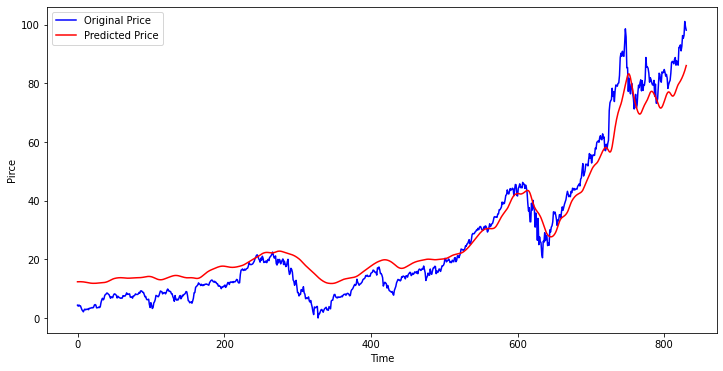

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label='Original Price')
plt.plot(y_predicted , 'r' , label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Pirce')
plt.legend()
plt.show()

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2022-07-17 09:19:12--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 54.161.241.46, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  13.8MB/s    in 1.0s    

2022-07-17 09:19:13 (13.8 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


In [ ]:
!streamlit run /content/app.py

2022-07-17 09:26:23.612 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 5, in <module>
    from streamlit.cli import main
  File "/usr/local/lib/python3.7/dist-packages/streamlit/__init__.py", line 70, in <module>
    from streamlit.delta_generator import DeltaGenerator as _DeltaGenerator
  File "/usr/local/lib/python3.7/dist-packages/streamlit/delta_generator.py", line 89, in <module>
    from streamlit.elements.arrow import ArrowMixin
  File "/usr/local/lib/python3.7/dist-packages/streamlit/elements/arrow.py", line 21, in <module>
    from pandas.io.formats.style import Styler
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py", line 63, in <module>
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py", line 2282, in <module>
    switch_backend(rcParams["backend"])
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py", line 221, in switch_backend
   